# Part 2:

Here i will be performing Description Calculation and Exploratory Data Analysis

In [1]:
# Load Bioactivity data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
df = pd.read_csv('data/bioactivity_preprocessed_data.csv')

## Calculate Lipinski Descriptors 
Christopher Lipinski, a scientist at Pfizer, came up with a set of rules for evaluating the druglikeness of compounds. The druglikeness is based on the Absorbtion, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski Rule. 

The Lipinski Rule stated the Following:
 * Molecular weight < 500 Dalton
 * Octanol-water partition coefficient (logP) < 5
 * Hydrogen bond donors < 5
 * Hydrogen bond acceptors <10

In [3]:
# Calculate descriptors: custom function taken from codeocean.com. It was modified to include the descriptors for-
# for this analysis. 

# the smiles notation include the chemical informatiom. that info tells me the exact atomic details of the molecule.
# Thats what will be used to compute the molecular descriptors.
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
    
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i=i+1
        
    columnNames = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
    return descriptors

In [4]:
# the lipinski descriptors are stored in this dataframe
df_lip = lipinski(df.canonical_smiles)

In [5]:
# Combine DataFrames:
# here i will look at the 2 dataframes that will be combined. 

df_lip

# I have 4 descriptors in this dataframe:
# ** MW: Molecular weight will tell me the size
# ** LogP: will tell me the solubility
# ** NumHDonors: relative number of hydrogen bond donors 
# ** NumHAcceptors: number of hydrogen acceptors 

,MW,LogP,NumHDonors,NumHAcceptors
0,469.435,3.90312,3.0,9.0
1,410.407,4.77190,4.0,7.0
2,466.519,5.11832,3.0,7.0
3,410.407,4.77190,4.0,7.0
4,531.572,3.29312,4.0,9.0
...,...,...,...,...
323,476.606,3.10134,3.0,5.0
324,532.670,3.21414,2.0,6.0
325,490.633,3.49144,3.0,5.0
326,447.495,3.27504,3.0,5.0


In [6]:
# this is the data from the first notebook. 
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,active,400.0
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,intermediate,2000.0
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,active,70.0
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,intermediate,2000.0
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,inactive,10000.0
...,...,...,...,...
323,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,active,22.0
324,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,active,31.0
325,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,active,26.0
326,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,active,42.0


In [7]:
# I will combine the preprocessed data and the lipinski data together because i want to have the standard value-
# and the bioactivity class columns.

# I will use the pd.concat fuction in order to combine the 2 dataframes.
# then i will put them in the df_combined variable 

df_combined = pd.concat([df,df_lip], axis=1)

In [8]:
# i can see in the combined dataframe below that the last 4 columns have been integrated into the df dataframe.
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,active,400.0,469.435,3.90312,3.0,9.0
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,intermediate,2000.0,410.407,4.77190,4.0,7.0
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,active,70.0,466.519,5.11832,3.0,7.0
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,intermediate,2000.0,410.407,4.77190,4.0,7.0
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,inactive,10000.0,531.572,3.29312,4.0,9.0
...,...,...,...,...,...,...,...,...
323,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,active,22.0,476.606,3.10134,3.0,5.0
324,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,active,31.0,532.670,3.21414,2.0,6.0
325,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,active,26.0,490.633,3.49144,3.0,5.0
326,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,active,42.0,447.495,3.27504,3.0,5.0


## Convert EC50 to pEC50
To allow EC50 data to be more uniformly distributed, i will convert EC50 to the negative logarithmic scale which is essentially -log10(EC50).

I am doing this conversion because the original EC50 has uneven distribution of the data points. So in order to make the distrubution more even, i will have to apply the -log transformation.

This custom function pEC50() will accept a DataFrame as input and will:
 * Take the IC50 values from standard_value column and converts it from nM to M by multiplying the value by 10^-9
 * Takes the molar value and apply -log10
 * Deletes the standard_value column and creates a new pEC50 column

In [9]:
def pEC50(input):
    pEC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        pEC50.append(-np.log10(molar))
    
    input['pEC50'] = pEC50
    x = input.drop('standard_value_norm', 1)
    
    return x

Point to note: 
* values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [10]:
df_combined.standard_value.describe()

count      328.000000
mean      2972.716463
std       5859.794442
min          3.000000
25%         97.250000
50%        419.000000
75%       2365.000000
max      30000.000000
Name: standard_value, dtype: float64

In [11]:
# TODO: Here i will create a custom fuction to cap the value: 
# *this function will read through the individual values in the standard_value column and if the value is greater than 100 million, it will cap the value to be 100 million. 

# *this will prevent the value from exceeding 100 million, therefore when the negative logarithmic transformation is performed, it will not be less than 1.0

def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
            
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    
    return x

In [12]:
# i will first apply the norm_value() function so that the values in the standard_value column are normalized
df_norm = norm_value(df_combined)

/var/folders/61/8v8r30q51_18dx4dp1bqfll00000gn/T/ipykernel_11008/3179435444.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


In [13]:
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,active,469.435,3.90312,3.0,9.0,400.0
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,intermediate,410.407,4.77190,4.0,7.0,2000.0
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,active,466.519,5.11832,3.0,7.0,70.0
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,intermediate,410.407,4.77190,4.0,7.0,2000.0
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,inactive,531.572,3.29312,4.0,9.0,10000.0
...,...,...,...,...,...,...,...,...
323,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,active,476.606,3.10134,3.0,5.0,22.0
324,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,active,532.670,3.21414,2.0,6.0,31.0
325,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,active,490.633,3.49144,3.0,5.0,26.0
326,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,active,447.495,3.27504,3.0,5.0,42.0


In [14]:
# Notice that in the case for my data nothing really changed. 
# I still want to inculde this for future versions of the code just incase more normalization needs to-
# happen.

df_norm.standard_value_norm.describe()

count      328.000000
mean      2972.716463
std       5859.794442
min          3.000000
25%         97.250000
50%        419.000000
75%       2365.000000
max      30000.000000
Name: standard_value_norm, dtype: float64

In [15]:
# TODO: apply the pEC50 function to the normalized dataframe and then i will call the new dataframe to be df_final
# notice that a new column named pEC50 has been created and the original EC50 column has been deleted. 
df_final = pEC50(df_norm)
df_final

/var/folders/61/8v8r30q51_18dx4dp1bqfll00000gn/T/ipykernel_11008/3782216961.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,active,469.435,3.90312,3.0,9.0,6.397940
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,intermediate,410.407,4.77190,4.0,7.0,5.698970
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,active,466.519,5.11832,3.0,7.0,7.154902
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,intermediate,410.407,4.77190,4.0,7.0,5.698970
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,inactive,531.572,3.29312,4.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
323,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,active,476.606,3.10134,3.0,5.0,7.657577
324,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,active,532.670,3.21414,2.0,6.0,7.508638
325,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,active,490.633,3.49144,3.0,5.0,7.585027
326,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,active,447.495,3.27504,3.0,5.0,7.376751


In [16]:
df_final.pEC50.describe()

count    328.000000
mean       6.309656
std        0.905263
min        4.522879
25%        5.626644
50%        6.377787
75%        7.012652
max        8.522879
Name: pEC50, dtype: float64

## Removing the 'intermediate' bioactivity class
Here i will be removing the intermediate class from my data set.

I want to allow simple comparison between the two bioactivity classes. Therefore i need to delete the intermediate class. 

I will call a new dataframe df_2class

In [17]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,active,469.435,3.90312,3.0,9.0,6.397940
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,active,466.519,5.11832,3.0,7.0,7.154902
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,inactive,531.572,3.29312,4.0,9.0,5.000000
6,CHEMBL3144672,Cc1[nH]n(-c2ccc(OCc3ccccc3)cc2)c(=O)c1/N=N/c1c...,active,530.562,5.57392,3.0,8.0,6.698970
7,CHEMBL3144775,Cc1[nH]n(-c2ccc(C(C)(C)C)cc2)c(=O)c1/N=N/c1c(O...,active,480.546,5.29242,3.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
323,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,active,476.606,3.10134,3.0,5.0,7.657577
324,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,active,532.670,3.21414,2.0,6.0,7.508638
325,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,active,490.633,3.49144,3.0,5.0,7.585027
326,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,active,447.495,3.27504,3.0,5.0,7.376751


In [18]:
df_2class.bioactivity_class.value_counts()

active      218
inactive     48
Name: bioactivity_class, dtype: int64

In [19]:
# save pre-processed dataframe to CSV file
df_2class.to_csv('bioactivity_data_class.csv', index=False)

## EDA (Chemical Space Analysis) via Lipinski descriptors

What this portion of the code essentially does is it allows us to look at the chemical space. The chemical space is sort of like a chimical universe. Each chemical compund can be thought of as a star. The active molecule would be compared to a constillation. 

A constillation plot can be used to perform chemical space analysis and create a constillation plot. Whereby the activie molecule would be have a larger size, compared to the less active molecule. 

I will apply that concept to the plot here.

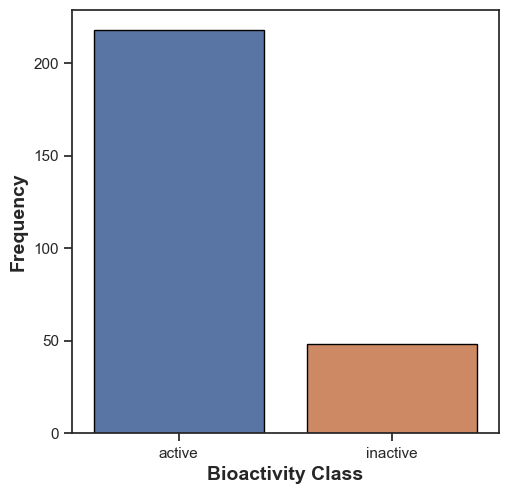

In [21]:
# Here i will create a simple frequency plot of the two bioactivity classes.
sns.set(style='ticks')

# This plot will compare the active and inactive molecules
plt.figure(figsize=(5.5, 5.5))

# No need to define the y variable because that would be the frequency.
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## Scatter Plot of Molecular Weight (MW) versus LogP (Soluability)
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

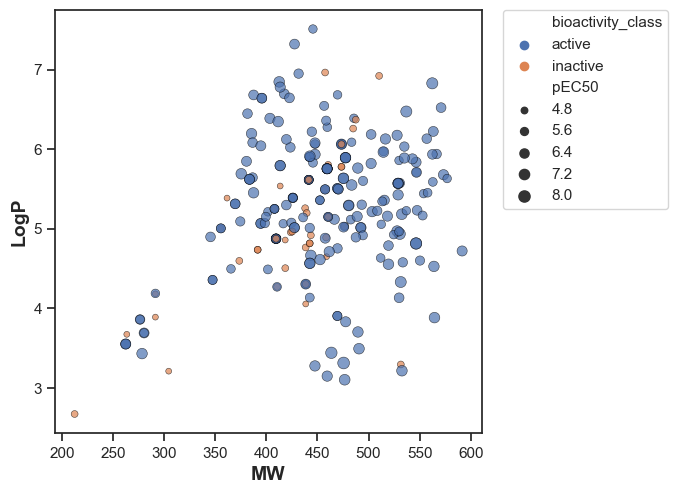

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pEC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

# This small portion of the code makes the legend outside the scatter plot
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

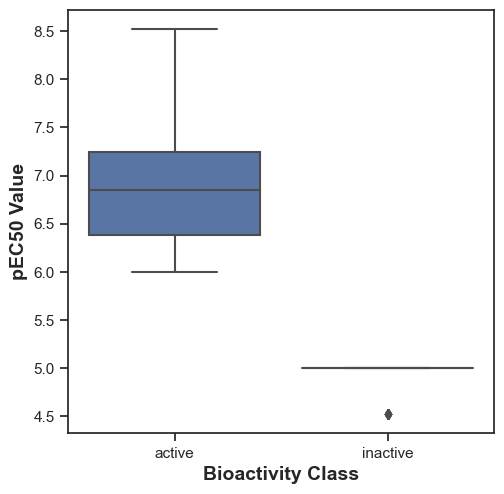

In [25]:
# I will use the same concept as above but for a boxplot and use the-
# pEC50 value as my y

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='pEC50', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pEC50 Value', fontsize=14, fontweight='bold')

plt.savefig('plot_pEC50.pdf')

# Here I see the distribution of the active and inactive class.
# This is to be expected because I used the threshhold to define active and inactive.
# The distribution of the active vs the inactive is pretty big

### Statistical Analysis: Mann-Whitney U Test
Here I will perform the Mann-Whitney U Test in order to look at the difference between the two bioactivity classes. 
 * This will test the statistical significance of the difference whether they are different or not. 

In [26]:
# The code for doing this analysis was modified from-
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed 
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    # seed the random generator
    seed(1)
    
    # actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]
    
    # compare samples
    stat, p = mannwhitneyu(active, inactive)
    
    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_'  + descriptor + '.csv'
    results.to_csv(filename)
    
    return results

Applying the function above to pEC50:
 * This will compare the active class and the inactive class, to see wether there is a statistical significance for the pEC50 variable 

Based on this analysis the p value is rather low, and therfore I reject the null hypothesis.
Therfore I can say that it is having different distribution.

In [27]:
mannwhitney('pEC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pEC50,10464.0,1.812446e-27,0.05,Different distribution (reject H0)


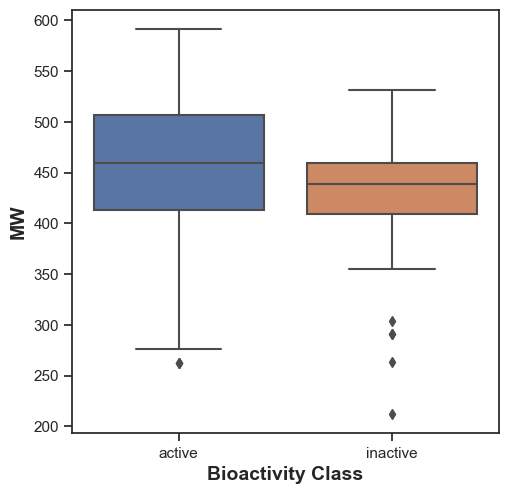

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='MW', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [29]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6767.0,0.00147,0.05,Different distribution (reject H0)


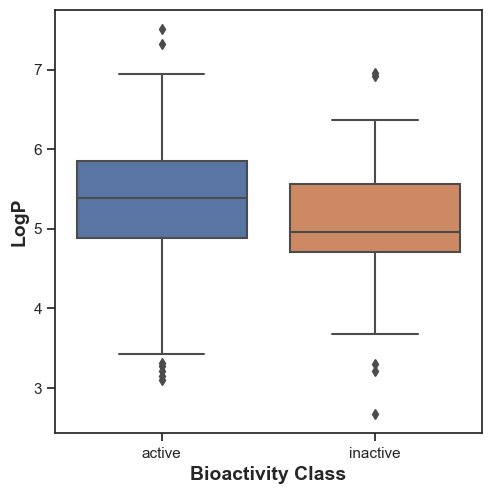

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [31]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6540.5,0.006705,0.05,Different distribution (reject H0)


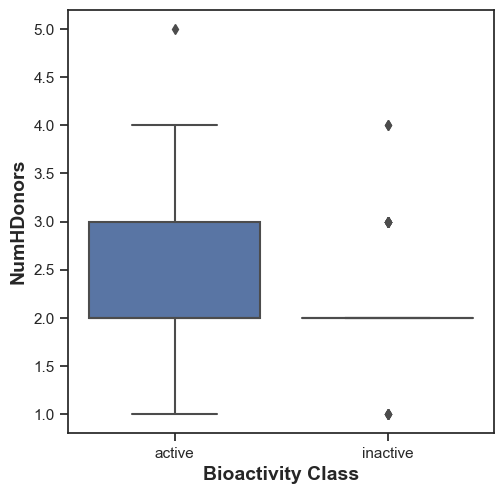

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [33]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,6033.5,0.053536,0.05,Same distribution (fail to reject H0)


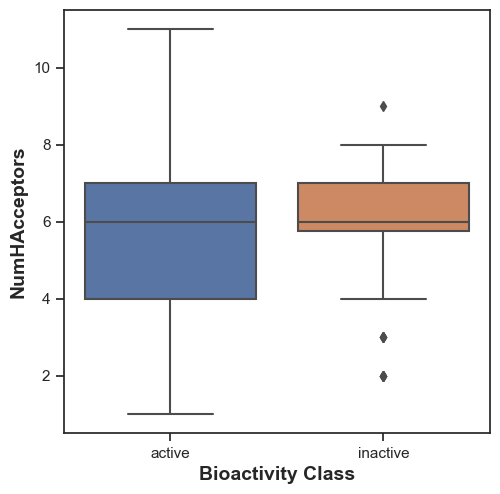

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [36]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4817.5,0.373644,0.05,Same distribution (fail to reject H0)


### Interpretation of Statistical Results
Box Plots
<!--  -->
pEC50 values:
 *  Taking a look at pEC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since the threshold values (EC50 < 1,000 nM = Actives, while EC50 > 10,000 nM = Inactives, corresponding to pEC50 > 6 = Actives and pEC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors:
 * Of the 4 Lipinski descriptors (MW, LogP, NumHDonors, NumHAcceptors) only NumHDonors, NumHAcceptors exhibited no difference between the active and inactive's. While the other two descriptors (MW, LogP) showed statistically significant difference between active and inactive.